In [1]:
import sklearn 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("Data/AMZN.csv", usecols = ["Date", "Close"])
df.head()

,Date,Close
0,2020-09-08,157.492004
1,2020-09-09,163.430496
2,2020-09-10,158.755493
3,2020-09-11,155.811005
4,2020-09-14,155.148499


<Axes: xlabel='Date', ylabel='Close'>

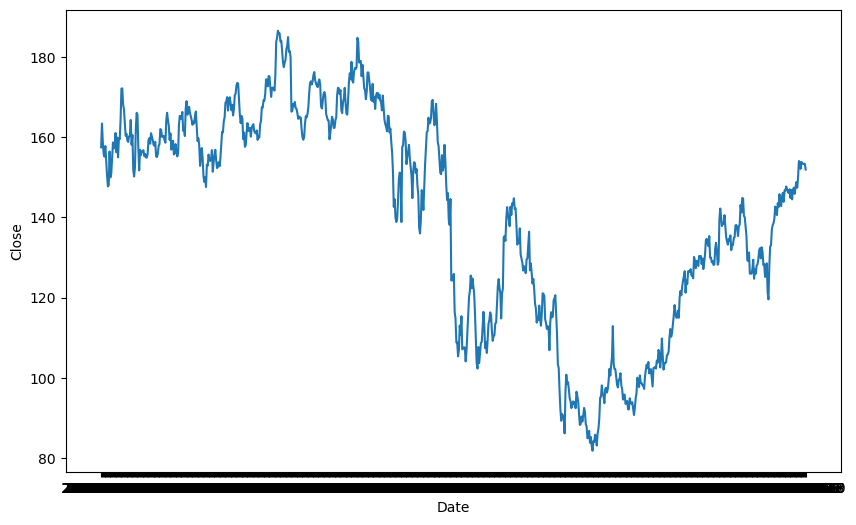

In [3]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Date", y="Close", data=df)

In [4]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    """
    Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters
    ---------
    timesteps : array of timesteps
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (setting a value will index from end of timesteps & values)
    label : label to show on plot of values
    """
    # Plot the series

    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("AMZN Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

In [5]:
dates = df["Date"]
close = df["Close"]

split_size = round(len(dates) * 0.8)

train_dates, train_close = dates[:split_size], close[:split_size]
test_dates, test_close = dates[split_size:], close[split_size:]

In [6]:
naive_forecast = test_close[:-1]

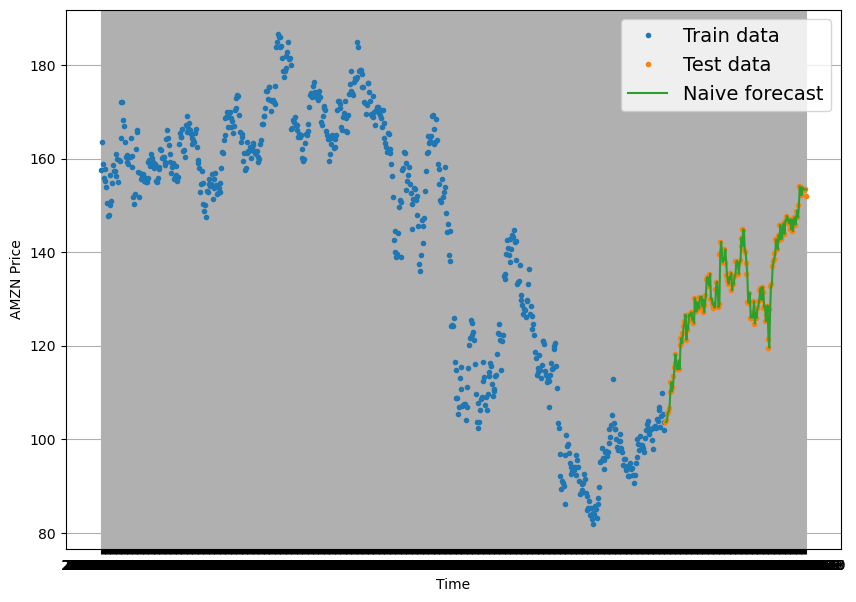

In [7]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=train_dates, values=train_close, label="Train data")
plot_time_series(timesteps=test_dates, values=test_close, label="Test data")
plot_time_series(timesteps=test_dates[1:], values=naive_forecast, format="-", label="Naive forecast");

# Drift Method

In [8]:
df["shifted_column"] = df["Close"].shift()
df["difference"] = df['Close'] - df["shifted_column"] 
df['difference'] = df['difference'].abs()
df["difference"].abs()
average_roc = df['difference'].mean()

In [9]:
drift_forecast = test_close[:-1] + average_roc

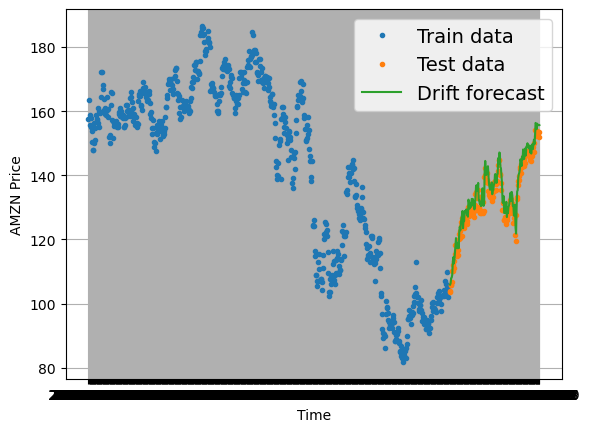

In [10]:
plot_time_series(timesteps=train_dates, values=train_close, label="Train data")
plot_time_series(timesteps=test_dates, values=test_close, label="Test data")
plot_time_series(timesteps=test_dates[1:], values=drift_forecast, format="-", label="Drift forecast");

# AR Model

In [14]:
df = pd.read_csv("Data/AMZN.csv", usecols = ["Date", "Close"])
df.head()

,Date,Close
0,2020-09-08,157.492004
1,2020-09-09,163.430496
2,2020-09-10,158.755493
3,2020-09-11,155.811005
4,2020-09-14,155.148499


In [16]:
df_for_use = df[:50]
df_for_use

,Date,Close
0,2020-09-08,157.492004
1,2020-09-09,163.430496
2,2020-09-10,158.755493
3,2020-09-11,155.811005
4,2020-09-14,155.148499
5,2020-09-15,157.806503
6,2020-09-16,153.904999
7,2020-09-17,150.436493
8,2020-09-18,147.745499
9,2020-09-21,148.023499


In [17]:
for i in range(1,20):
    df_for_use[f'Lag_{i}']=df_for_use["Close"].shift(i)

df_for_use.dropna(inplace=True)

train_size = int(0.8 * len(df_for_use))
train_data = df_for_use[:train_size]
test_data = df_for_use[train_size:]

/tmp/ipykernel_1665/3926799105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_use[f'Lag_{i}']=df_for_use["Close"].shift(i)
/tmp/ipykernel_1665/3926799105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_use[f'Lag_{i}']=df_for_use["Close"].shift(i)
/tmp/ipykernel_1665/3926799105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [18]:
y_train = train_data["Close"]
y_test = test_data["Close"]

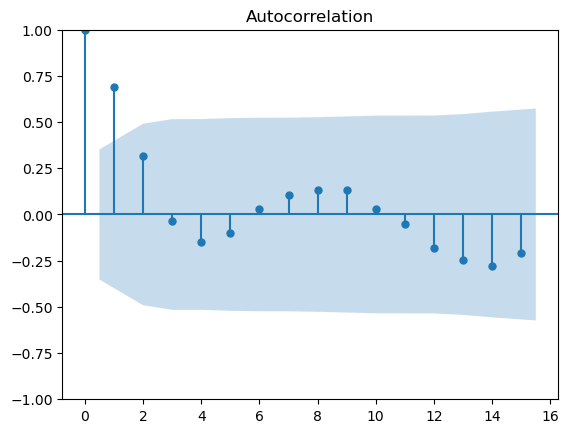

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
series = df_for_use["Close"]
plot_acf(series)
plt.show()

In [22]:
df_for_use["Close"].corr(df_for_use["Close"].shift(1))

0.6932489805617724

In [24]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

lag_order = 1
ar_model = AutoReg(y_train, lags =lag_order)
ar_results = ar_model.fit()

/Users/rish/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
y_pred = ar_results.predict(start=len(train_data), end = len(train_data)+len(test_data) -1, dynamic = False)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 6.28
Root Mean Squared Error: 6.94


/Users/rish/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/rish/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


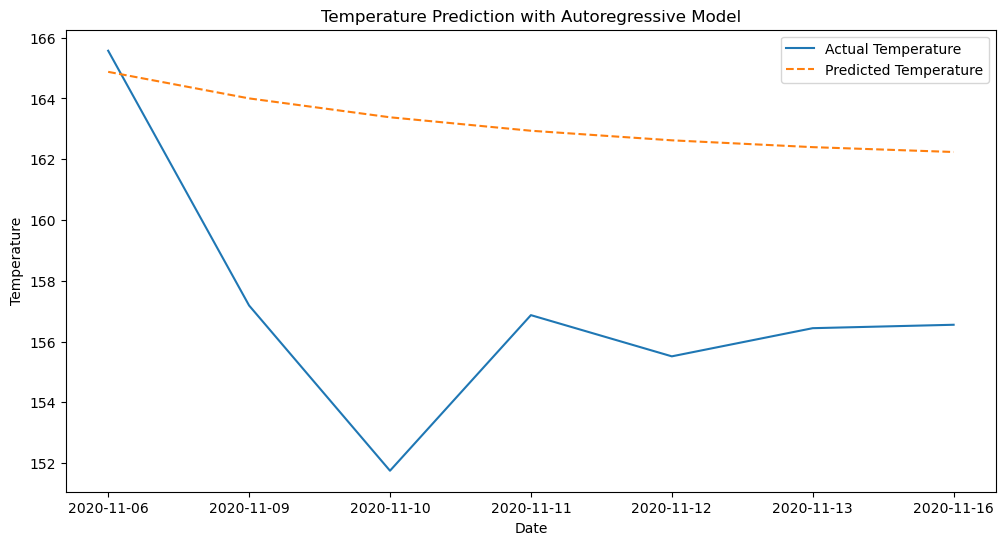

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(test_data["Date"] ,y_test, label='Actual Temperature')
plt.plot( test_data["Date"],y_pred, label='Predicted Temperature', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.title('Temperature Prediction with Autoregressive Model')
plt.show()